<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(X[0])
    for i in range(len(X)):
        result += X[i] @ V[i]
    return result

# Тесты
def test_sum_prod():
    # Тест 1: две матрицы 2x2 и два вектора
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([[1], [2]]), np.array([[3], [4]])]
    result = sum_prod(X, V)
    expected = np.array([[1, 2], [3, 4]]) @ np.array([[1], [2]]) + np.array([[5, 6], [7, 8]]) @ np.array([[3], [4]])
    assert np.allclose(result, expected), "Test 1 failed"
    
    # Тест 2: одна матрица и один вектор
    X = [np.array([[2, 0], [0, 2]])]
    V = [np.array([[1], [1]])]
    result = sum_prod(X, V)
    expected = np.array([[2], [2]])
    assert np.allclose(result, expected), "Test 2 failed"
    
    print("All tests passed!")

test_sum_prod()

All tests passed!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

# Тесты
def test_binarize():
    # Тест 1: базовый тест с default threshold
    M = np.array([[0.1, 0.6], [0.3, 0.9]])
    result = binarize(M)
    expected = np.array([[0, 1], [0, 1]])
    assert np.array_equal(result, expected), "Test 1 failed"
    
    # Тест 2: пользовательский threshold
    M = np.array([[0.1, 0.6], [0.3, 0.9]])
    result = binarize(M, threshold=0.7)
    expected = np.array([[0, 0], [0, 1]])
    assert np.array_equal(result, expected), "Test 2 failed"
    
    # Тест 3: все значения меньше threshold
    M = np.array([[0.1, 0.2], [0.3, 0.4]])
    result = binarize(M, threshold=0.5)
    expected = np.zeros((2, 2), dtype=int)
    assert np.array_equal(result, expected), "Test 3 failed"
    
    print("All tests passed!")

test_binarize()

All tests passed!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
def unique_rows(mat):
    result = []
    for row in mat:
        result.append(np.unique(row))
    return result

def unique_columns(mat):
    result = []
    for i in range(mat.shape[1]):
        result.append(np.unique(mat[:, i]))
    return result

# Тесты
def test_unique_rows():
    # Тест 1: базовый тест
    M = np.array([[1, 2, 2, 3], [4, 4, 4, 5]])
    result = unique_rows(M)
    assert np.array_equal(result[0], np.array([1, 2, 3])), "Test 1.1 failed"
    assert np.array_equal(result[1], np.array([4, 5])), "Test 1.2 failed"
    print("All unique_rows tests passed!")

def test_unique_columns():
    # Тест 1: базовый тест
    M = np.array([[1, 4], [2, 4], [2, 5]])
    result = unique_columns(M)
    assert np.array_equal(result[0], np.array([1, 2])), "Test 1.1 failed"
    assert np.array_equal(result[1], np.array([4, 5])), "Test 1.2 failed"
    print("All unique_columns tests passed!")

test_unique_rows()
test_unique_columns()

All unique_rows tests passed!
All unique_columns tests passed!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Row means: [0.05033292 0.03746595 0.25323426]
Row variances: [0.37074788 1.23935825 1.7810638 ]
Column means: [ 0.5529787   0.03029137 -0.24223694]
Column variances: [1.22383335 1.08700779 0.78301173]


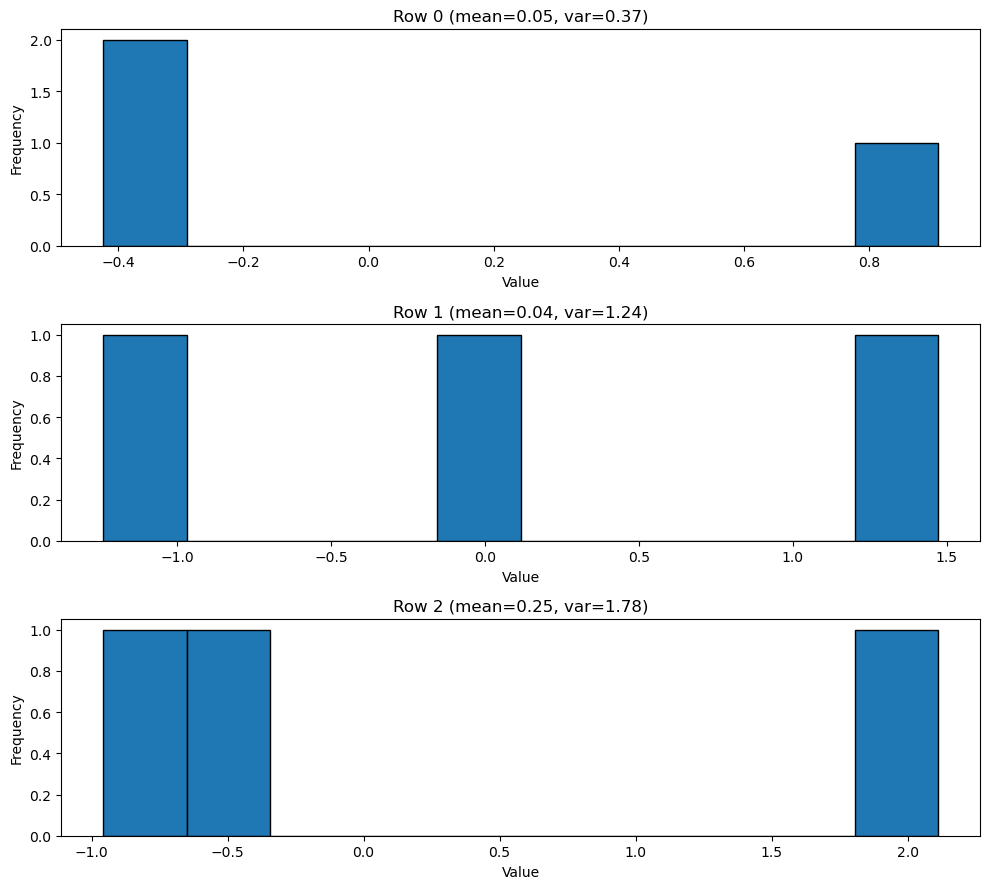

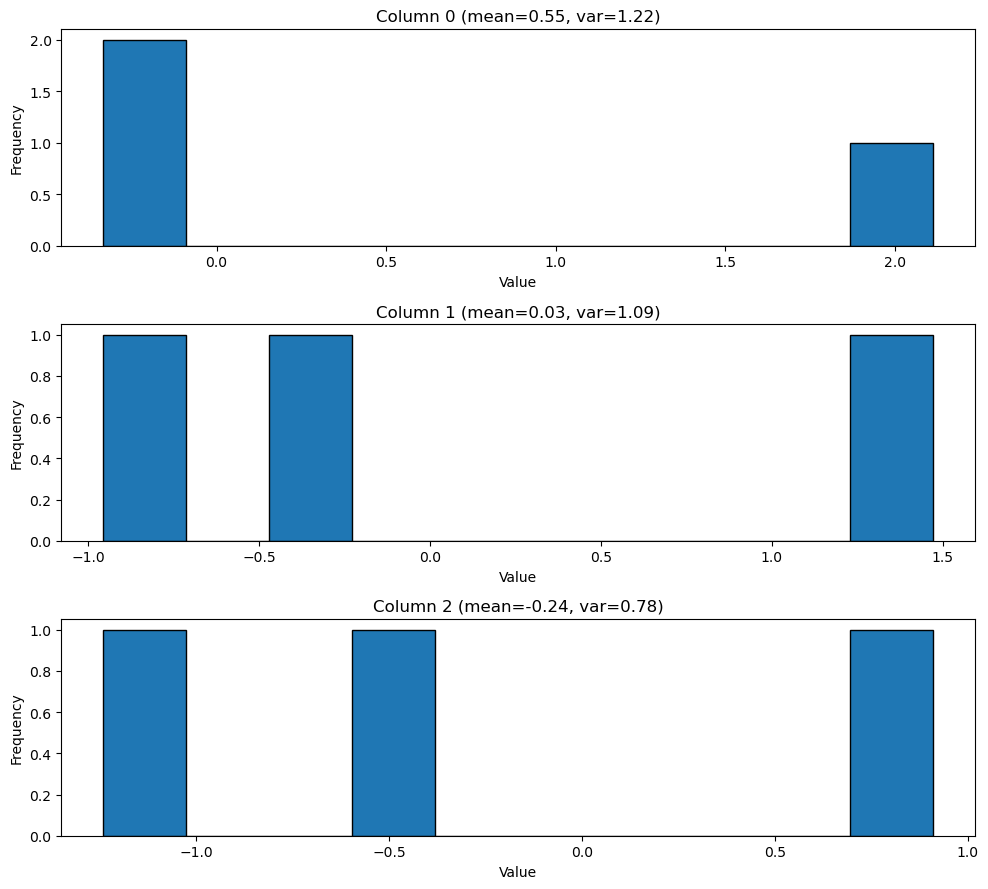

In [5]:
def analyze_matrix(m, n, num_bins=10):
    # Заполняем матрицу случайными числами из нормального распределения
    matrix = np.random.randn(m, n)
    
    # Статистика по строкам
    row_mean = np.mean(matrix, axis=1)
    row_var = np.var(matrix, axis=1)
    
    # Статистика по столбцам
    col_mean = np.mean(matrix, axis=0)
    col_var = np.var(matrix, axis=0)
    
    print("Row means:", row_mean)
    print("Row variances:", row_var)
    print("Column means:", col_mean)
    print("Column variances:", col_var)
    
    # Гистограммы для строк
    fig, axes = plt.subplots(m, 1, figsize=(10, 3*m))
    if m == 1:
        axes = [axes]
    for i in range(m):
        axes[i].hist(matrix[i, :], bins=num_bins, edgecolor='black')
        axes[i].set_title(f'Row {i} (mean={row_mean[i]:.2f}, var={row_var[i]:.2f})')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    # Гистограммы для столбцов
    fig, axes = plt.subplots(n, 1, figsize=(10, 3*n))
    if n == 1:
        axes = [axes]
    for i in range(n):
        axes[i].hist(matrix[:, i], bins=num_bins, edgecolor='black')
        axes[i].set_title(f'Column {i} (mean={col_mean[i]:.2f}, var={col_var[i]:.2f})')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    return matrix, row_mean, row_var, col_mean, col_var

# Пример использования
matrix, r_mean, r_var, c_mean, c_var = analyze_matrix(3, 3)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [6]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

# Тесты
def test_chess():
    # Тест 1: 3x3 с 1 и 0
    result = chess(3, 3, 1, 0)
    expected = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
    assert np.array_equal(result, expected), "Test 1 failed"
    
    # Тест 2: 2x4 с 5 и 3
    result = chess(2, 4, 5, 3)
    expected = np.array([[5, 3, 5, 3], [3, 5, 3, 5]])
    assert np.array_equal(result, expected), "Test 2 failed"
    
    print("All tests passed!")
    print(result)

test_chess()

All tests passed!
[[5. 3. 5. 3.]
 [3. 5. 3. 5.]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

Rectangle test passed!
Ellipse test passed!


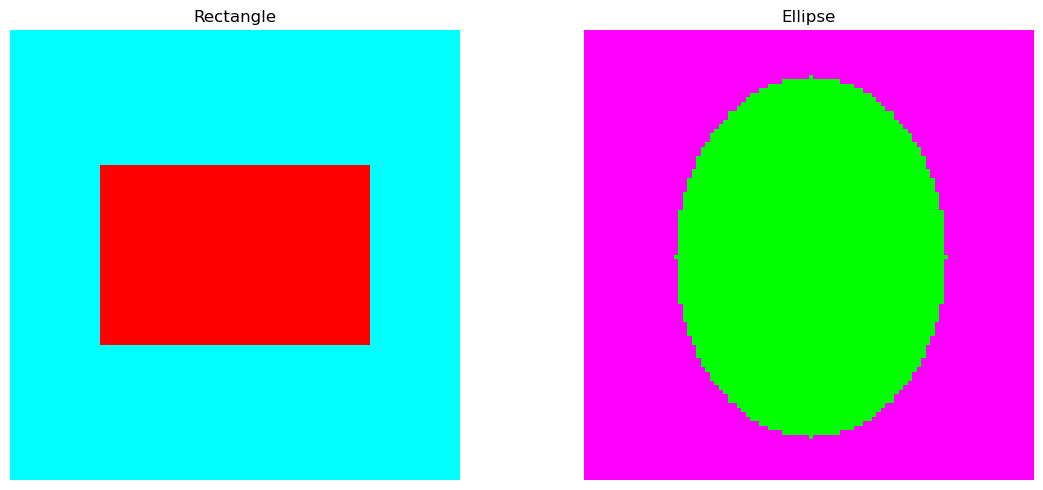

In [7]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Создаем изображение с цветом фона
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color
    
    # Вычисляем координаты прямоугольника (центрировано)
    x_start = (n - a) // 2
    y_start = (m - b) // 2
    x_end = x_start + a
    y_end = y_start + b
    
    # Рисуем прямоугольник
    image[y_start:y_end, x_start:x_end] = rectangle_color
    
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Создаем изображение с цветом фона
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color
    
    # Центр эллипса
    cx, cy = n // 2, m // 2
    
    # Рисуем эллипс
    for i in range(m):
        for j in range(n):
            # Уравнение эллипса
            if ((j - cx)**2 / (a**2) + (i - cy)**2 / (b**2)) <= 1:
                image[i, j] = ellipse_color
    
    return image

# Тесты
def test_draw_rectangle():
    # Тест 1: простой прямоугольник
    result = draw_rectangle(4, 4, 8, 8, (255, 0, 0), (0, 0, 255))
    # Проверяем что центр красный
    assert np.array_equal(result[4, 4], [255, 0, 0]), "Test 1 failed"
    # Проверяем что угол синий
    assert np.array_equal(result[0, 0], [0, 0, 255]), "Test 1.2 failed"
    print("Rectangle test passed!")

def test_draw_ellipse():
    # Тест 1: эллипс
    result = draw_ellipse(5, 5, 11, 11, (255, 0, 0), (0, 0, 255))
    # Проверяем что центр красный
    assert np.array_equal(result[5, 5], [255, 0, 0]), "Test 1 failed"
    print("Ellipse test passed!")

test_draw_rectangle()
test_draw_ellipse()

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
rect = draw_rectangle(60, 40, 100, 100, (255, 0, 0), (0, 255, 255))
axes[0].imshow(rect)
axes[0].set_title('Rectangle')
axes[0].axis('off')

ell = draw_ellipse(30, 40, 100, 100, (0, 255, 0), (255, 0, 255))
axes[1].imshow(ell)
axes[1].set_title('Ellipse')
axes[1].axis('off')
plt.tight_layout()
plt.show()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Mean: 3.8
Variance: 3.3600000000000003
Standard Deviation: 1.8330302779823362
Local maxima (indices, values): [(1, np.int64(3)), (3, np.int64(5)), (5, np.int64(6)), (7, np.int64(7))]
Local minima (indices, values): [(2, np.int64(2)), (4, np.int64(4)), (6, np.int64(3)), (8, np.int64(2))]


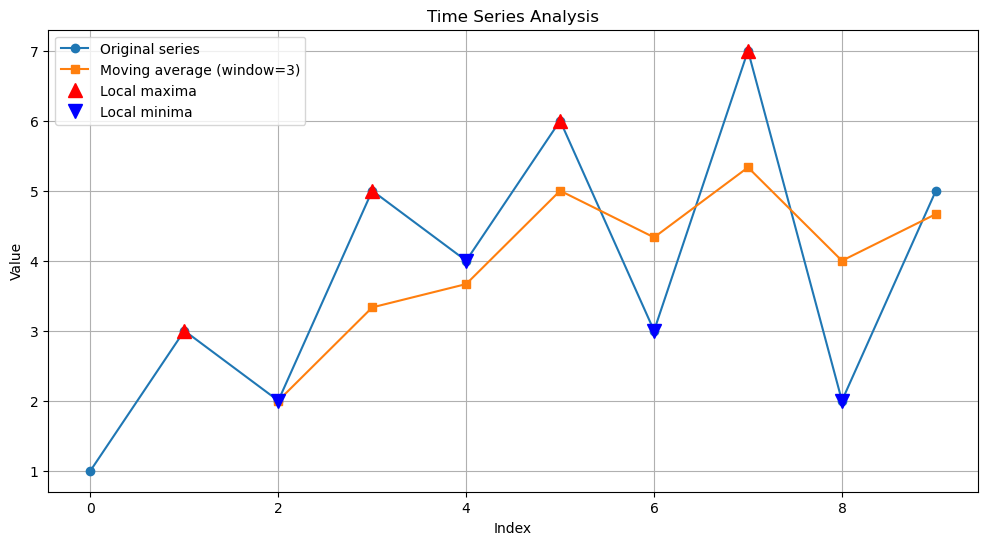

(np.float64(3.8),
 np.float64(3.3600000000000003),
 np.float64(1.8330302779823362),
 [(1, np.int64(3)), (3, np.int64(5)), (5, np.int64(6)), (7, np.int64(7))],
 [(2, np.int64(2)), (4, np.int64(4)), (6, np.int64(3)), (8, np.int64(2))],
 array([2.        , 3.33333333, 3.66666667, 5.        , 4.33333333,
        5.33333333, 4.        , 4.66666667]))

In [8]:
def analyze_time_series(series, window_size=3):
    # Математическое ожидание и дисперсия
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)
    
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print(f"Standard Deviation: {std_dev}")
    
    # Локальные максимумы и минимумы
    local_maxima = []
    local_minima = []
    
    for i in range(1, len(series) - 1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_maxima.append((i, series[i]))
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            local_minima.append((i, series[i]))
    
    print(f"Local maxima (indices, values): {local_maxima}")
    print(f"Local minima (indices, values): {local_minima}")
    
    # Скользящее среднее
    moving_avg = np.convolve(series, np.ones(window_size)/window_size, mode='valid')
    
    # Визуализация
    plt.figure(figsize=(12, 6))
    plt.plot(series, label='Original series', marker='o')
    plt.plot(range(window_size-1, len(series)), moving_avg, label=f'Moving average (window={window_size})', marker='s')
    
    # Отмечаем локальные экстремумы
    if local_maxima:
        indices_max, values_max = zip(*local_maxima)
        plt.plot(indices_max, values_max, 'r^', markersize=10, label='Local maxima')
    if local_minima:
        indices_min, values_min = zip(*local_minima)
        plt.plot(indices_min, values_min, 'bv', markersize=10, label='Local minima')
    
    plt.legend()
    plt.grid(True)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Time Series Analysis')
    plt.show()
    
    return mean, variance, std_dev, local_maxima, local_minima, moving_avg

# Пример использования
series = np.array([1, 3, 2, 5, 4, 6, 3, 7, 2, 5])
analyze_time_series(series, window_size=3)

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [9]:
def one_hot_encode(labels):
    # Определяем количество классов
    num_classes = len(np.unique(labels))
    max_label = np.max(labels)
    num_classes = max_label + 1
    
    # Создаем матрицу one-hot encoding
    encoded = np.zeros((len(labels), num_classes), dtype=int)
    
    for i, label in enumerate(labels):
        encoded[i, label] = 1
    
    return encoded

# Тесты
def test_one_hot_encode():
    # Тест 1: пример из задания
    labels = np.array([0, 2, 3, 0])
    result = one_hot_encode(labels)
    expected = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]])
    assert np.array_equal(result, expected), "Test 1 failed"
    
    # Тест 2: другой пример
    labels = np.array([1, 1, 0])
    result = one_hot_encode(labels)
    expected = np.array([[0, 1], [0, 1], [1, 0]])
    assert np.array_equal(result, expected), "Test 2 failed"
    
    print("All tests passed!")
    print("Example:")
    labels = np.array([0, 2, 3, 0])
    print(f"Labels: {labels}")
    print(f"One-hot encoding:\n{one_hot_encode(labels)}")

test_one_hot_encode()

All tests passed!
Example:
Labels: [0 2 3 0]
One-hot encoding:
[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
